# AutoTS 2019

In [6]:
# Importa bibliotecas; inicializa variáveis; define funções.
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import auto_ts as AT
import math as mt
from sklearn.metrics import mean_squared_error
import seaborn as sns

colunas = ['data','total','ibc','pib','consumo', 'ICST-R', 'geracaoGWh','IndGeral']

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

dados_autoML = pd.read_csv('dadosRonaldo.csv')
dados_autoML.head()

df = dados_autoML[colunas]
df = df.set_index('data')
df.index = pd.to_datetime(df.index)

df.info()

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

df

Imported auto_timeseries version:0.0.36. Call by using:
model = auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['best'],
                verbose=2)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2014-01-01 to 2020-12-01
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total       84 non-null     int64  
 1   ibc         84 non-null     float64
 2   pib         84 non-null     float64
 3   consumo     84 non-null     float64
 4   ICST-R      84 non-null     float64
 5   geracaoGWh  84 non-null     float64
 6   IndGeral    84 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 5.2 KB
Rows     :  84
Columns  :  7

Features : 
 ['total', 'ibc', 'pib', 'consumo', 'ICST-R', 'geracaoGWh', 'In

total   ibc       pib       consumo  ICST-R    geracaoGWh  \
data                                                                       
2014-01-01  13427897  2.75  455935.0  4.027976e+07    97.8  50045.962407   
2014-02-01  14152120  3.13  450358.8  4.165349e+07    96.7  46459.730274   
2014-03-01  13710770  3.09  462159.8  4.026943e+07    96.3  48004.277170   
2014-04-01  12602895  2.37  468767.5  3.959185e+07    92.6  45412.583753   
2014-05-01  14603442  2.23  473347.1  3.910050e+07    94.6  44890.282526   
...              ...   ...       ...           ...     ...           ...   
2020-08-01  33983713 -3.35  628818.8  3.912152e+07    87.8  45954.347797   
2020-09-01  32205815 -3.56  632047.2  4.020856e+07    91.5  46045.040560   
2020-10-01  33749277 -3.94  660199.5  4.245064e+07    95.2  46098.056273   
2020-11-01  33762169 -4.06  666928.9  4.100828e+07    93.8  45883.704482   
2020-12-01  31490103 -3.99  676371.9  4.187399e+07    93.9  45799.031123   

            IndGeral  
data                  
2014-01-01      53.1  
2014-02-01      52.3  
2014-03-01      52.4  
2014-04-01      49.2  
2014-05-01      47.9  
...              ...  
2020-08-01      57.0  
2020-09-01      61.6  
2020-10-01      61.8  
2020-11-01      62.9  
2020-12-01      63.1  

[84 rows x 7 columns]

Explorando o conjunto de dados utilizados.

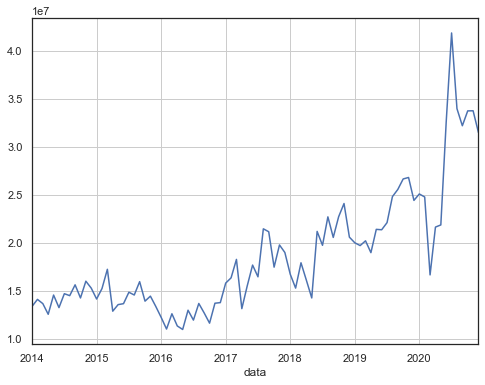

In [8]:
ec_df = df
ec_data = ec_df['total']
ec_data.head()
df.describe()
ec_data.plot(grid=True)

Vamos avaliar o funcionamento da AutoTS, utilizando os dados de 2014 até 2018 para prever o 'total' em 2019. 

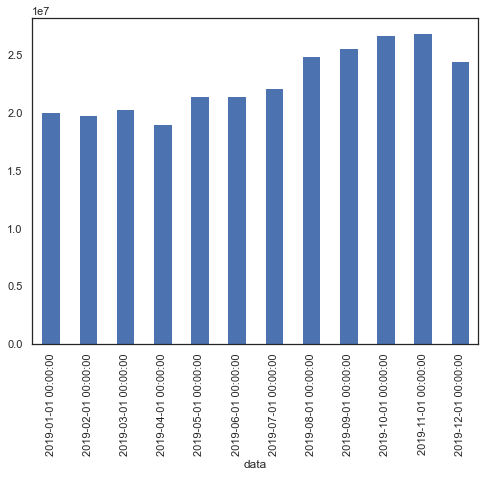

In [11]:
ec_df_2019=ec_df.loc['2019']
ec_data_2019=ec_df_2019['total']
ec_data_2019.plot.bar()

In [12]:
final_df = df.copy()
final_df=final_df.reset_index()
final_df=final_df[colunas]

final_df.head(10)

data     total   ibc       pib      consumo  ICST-R    geracaoGWh  \
0 2014-01-01  13427897  2.75  455935.0  40279759.00    97.8  50045.962407   
1 2014-02-01  14152120  3.13  450358.8  41653487.00    96.7  46459.730274   
2 2014-03-01  13710770  3.09  462159.8  40269429.00    96.3  48004.277170   
3 2014-04-01  12602895  2.37  468767.5  39591854.00    92.6  45412.583753   
4 2014-05-01  14603442  2.23  473347.1  39100499.00    94.6  44890.282526   
5 2014-06-01  13296350  1.85  458516.5  37726472.88    93.1  41970.305389   
6 2014-07-01  14742923  1.45  481994.0  37866809.00    91.6  42991.945569   
7 2014-08-01  14540126  1.13  477052.9  38550694.00    92.0  42636.899277   
8 2014-09-01  15667226  0.85  476520.6  38894976.00    90.5  43171.224770   
9 2014-10-01  14301399  0.49  493304.7  40100440.59    88.0  46186.817965   

   IndGeral  
0      53.1  
1      52.3  
2      52.4  
3      49.2  
4      47.9  
5      47.4  
6      46.4  
7      46.5  
8      46.5  
9      45.8

Preparando os conjuntos de treino e teste; também outros parâmetros usado pelo AutoTS.

In [14]:
traindata = final_df[:60]
testdata = final_df[60:72]
print(traindata.shape, testdata.shape)

ts_column = 'data'
sep = ','
target = 'total'

(60, 8) (12, 8)


In [16]:
# Dados de treino.
traindata.head()

data     total   ibc       pib     consumo  ICST-R    geracaoGWh  \
0 2014-01-01  13427897  2.75  455935.0  40279759.0    97.8  50045.962407   
1 2014-02-01  14152120  3.13  450358.8  41653487.0    96.7  46459.730274   
2 2014-03-01  13710770  3.09  462159.8  40269429.0    96.3  48004.277170   
3 2014-04-01  12602895  2.37  468767.5  39591854.0    92.6  45412.583753   
4 2014-05-01  14603442  2.23  473347.1  39100499.0    94.6  44890.282526   

   IndGeral  
0      53.1  
1      52.3  
2      52.4  
3      49.2  
4      47.9

In [17]:
# Dados de teste.
testdata.head()

data     total   ibc       pib      consumo  ICST-R    geracaoGWh  \
60 2019-01-01  20039718  1.13  578452.6  40033265.79    84.5  53103.613862   
61 2019-02-01  19745890  1.35  567984.5  39126855.44    84.3  47109.519973   
62 2019-03-01  20240937  1.21  579172.6  41065355.60    82.1  49768.704279   
63 2019-04-01  19011266  0.91  592916.0  40646412.05    82.5  47347.279561   
64 2019-05-01  21433199  1.57  604607.4  39220655.51    80.7  46865.964756   

    IndGeral  
60      64.6  
61      64.6  
62      62.0  
63      58.4  
64      56.5

Rodando o AutoTS: ferramenta realizando o set inicial e o fit. 

"WARNING: Running best models will take time... Be Patient..." <= Aviso da ferramenta...

Start of Fit.....
Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Error: Stationary test failed. Data must be np.array. Check your input and try stationary test again
    Target variable given as = total
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: data sep: , target: total
    Loaded pandas dataframe...
    pandas Dataframe loaded successfully. Shape of data set = (60, 7)


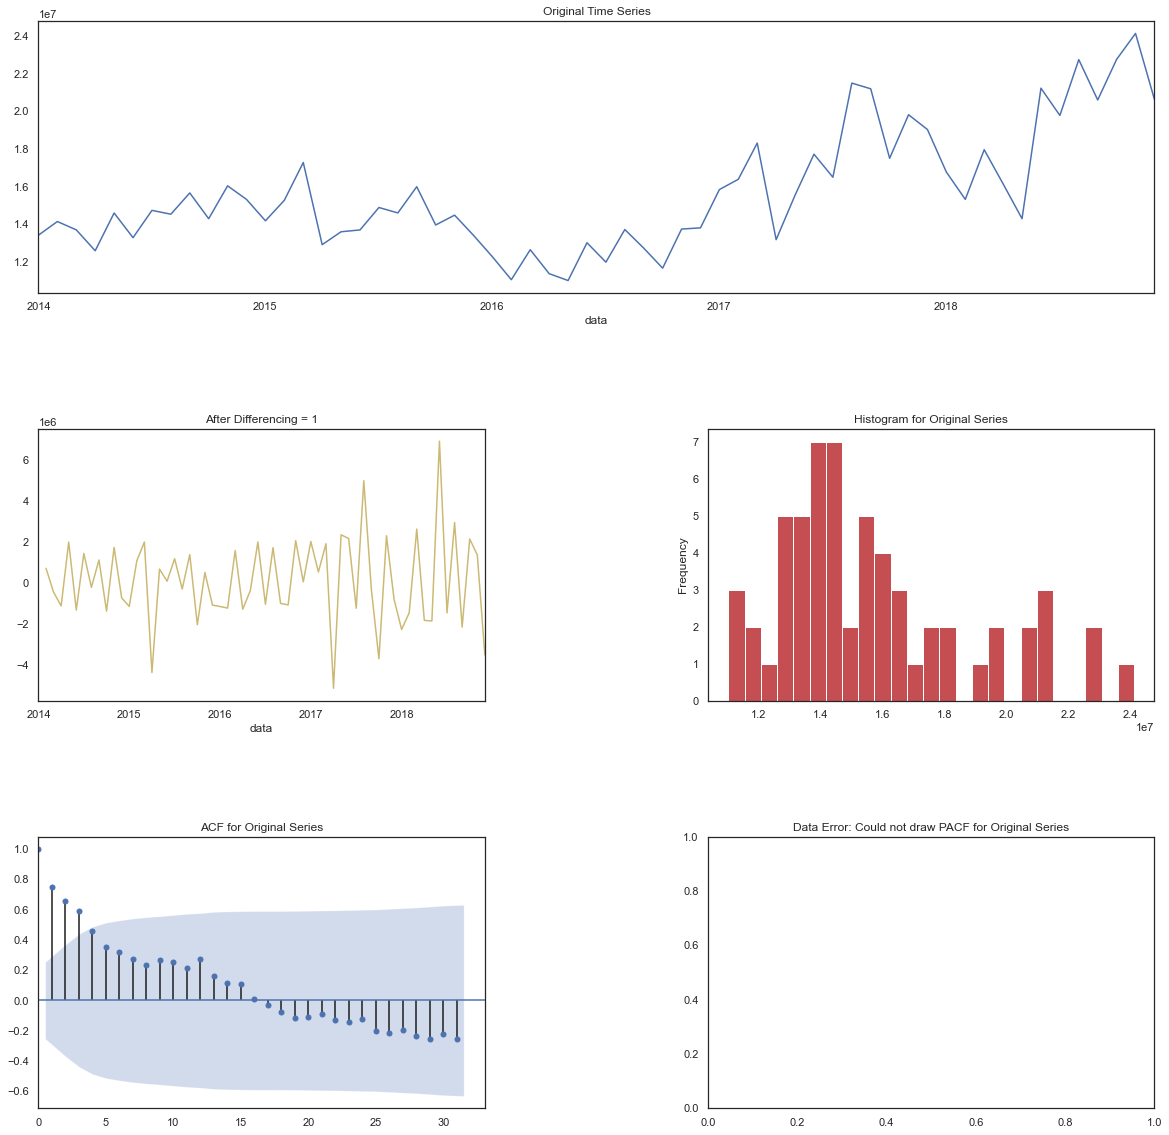

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
    Fit-Predict data (shape=(60, 8)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 35 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 4,875,434.21
    Std Deviation of actuals = 1,842,443.27
    Normalized RMSE = 265%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 40 Test Shape: 5
    Root Mean Squared Error predictions vs actuals = 5,990,995.67
    Std Deviation of actuals = 2,427,892.46
    Normalized RMSE = 247%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 45 Test Shape: 5
    Root Mean Squared Error predictions vs actua

 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1041.240, Time=0.51 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=1044.343, Time=1.29 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1037.481, Time=0.45 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1049.013, Time=0.26 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1040.190, Time=0.66 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1048.217, Time=0.28 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=1041.104, Time=1.41 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1036.939, Time=0.48 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1045.560, Time=0.14 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1038.760, Time=1.27 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1041.769, Time=0.82 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=1040.762, Time=1.42 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,2)(1,1,0)[12] intercept   : AIC=1036.292, Time=0.79 sec
 ARIM

 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1899.074, Time=0.38 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1893.792, Time=0.60 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=1893.821, Time=0.45 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=1893.204, Time=0.31 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=1895.789, Time=1.07 sec
 ARIMA(1,0,0)(2,0,0)[12]             : AIC=1889.494, Time=0.36 sec
 ARIMA(1,0,0)(1,0,0)[12]             : AIC=1892.733, Time=0.09 sec
 ARIMA(1,0,0)(3,0,0)[12]             : AIC=1891.333, Time=1.03 sec
 ARIMA(1,0,0)(2,0,1)[12]             : AIC=1891.317, Time=0.82 sec
 ARIMA(1,0,0)(1,0,1)[12]             : AIC=1891.681, Time=0.20 sec
 ARIMA(1,0,0)(3,0,1)[12]             : AIC=1893.327, Time=1.56 sec
 ARIMA(0,0,0)(2,0,0)[12]             : AIC=1893.809, Time=0.28 sec
 ARIMA(2,0,0)(2,0,0)[12]             : AIC=1891.814, Time=0.30 sec
 ARIMA(1,0,1)(2,0,0)[12]             : AIC=1891.817, Time=0.36 sec
 ARIMA(0,0,1)(2,0,0)[12]             : AIC=1891.209, Time=0.31

 Iteration 22 completed
 Iteration 23 completed
 Iteration 24 completed
 Iteration 25 completed
 Iteration 26 completed
 Iteration 27 completed
 Iteration 28 completed
 Iteration 29 completed
 Iteration 30 completed
 Iteration 31 completed
 Iteration 32 completed
    Best AR order p = 3, MA order q = 0, Interim metric = 2100.818

Additional Variable in VAR model = consumo
 Iteration 33 completed
 Iteration 34 completed
 Iteration 35 completed
 Iteration 36 completed
 Iteration 37 completed
 Iteration 38 completed
 Iteration 39 completed
 Iteration 40 completed
 Iteration 41 completed
 Iteration 42 completed
 Iteration 43 completed
 Iteration 44 completed
 Iteration 45 completed
 Iteration 46 completed
 Iteration 47 completed
 Iteration 48 completed
    Best AR order p = 1, MA order q = 0, Interim metric = 2402.970

Additional Variable in VAR model = ICST-R
 Iteration 49 completed
 Iteration 50 completed
 Iteration 51 completed
 Iteration 52 completed
 Iteration 53 completed
 Iteration 

 Iteration 82 completed
 Iteration 83 completed
 Iteration 84 completed
 Iteration 85 completed
 Iteration 86 completed
 Iteration 87 completed
 Iteration 88 completed
 Iteration 89 completed
 Iteration 90 completed
 Iteration 91 completed
 Iteration 92 completed
 Iteration 93 completed
 Iteration 94 completed
 Iteration 95 completed
 Iteration 96 completed
    Best AR order p = 2, MA order q = 0, Interim metric = 1756.441
Best variable selected for VAR: ibc
    Root Mean Squared Error predictions vs actuals = 2,994,866.01
    Std Deviation of actuals = 2,471,810.70
    Normalized RMSE = 126%

Fold Number: 5 --> Train Shape: 54 Test Shape: 5

Additional Variable in VAR model = ibc
 Iteration 1 completed
 Iteration 2 completed
 Iteration 3 completed
 Iteration 4 completed
 Iteration 5 completed
 Iteration 6 completed
 Iteration 7 completed
 Iteration 8 completed
 Iteration 9 completed
 Iteration 10 completed
 Iteration 11 completed
 Iteration 12 completed
 Iteration 13 completed
 Iterat

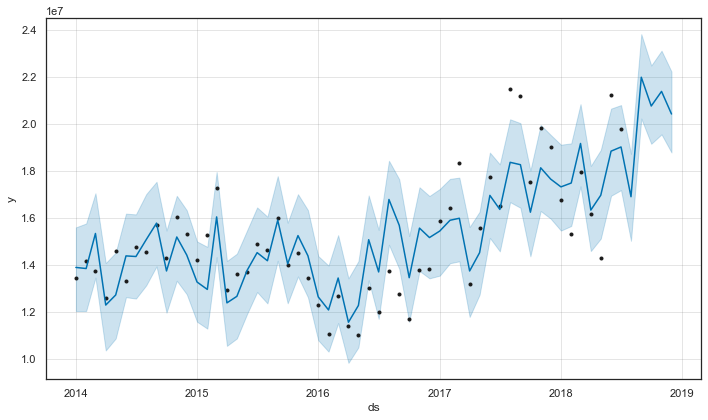

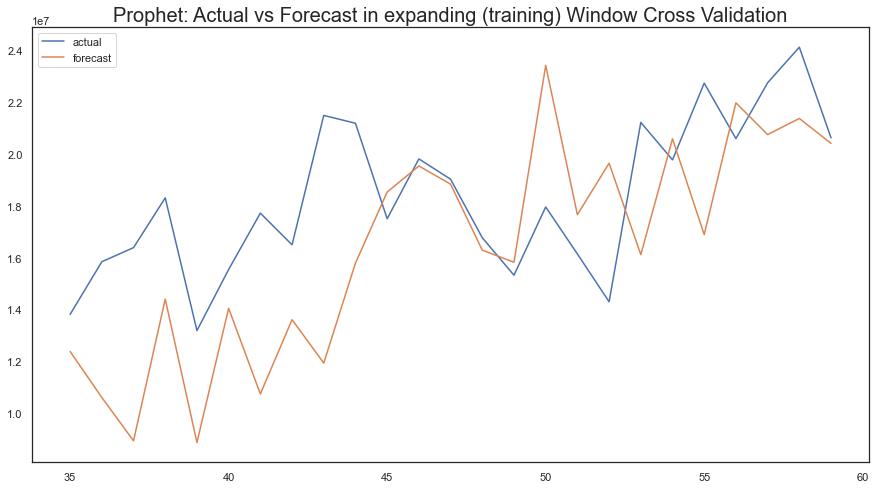

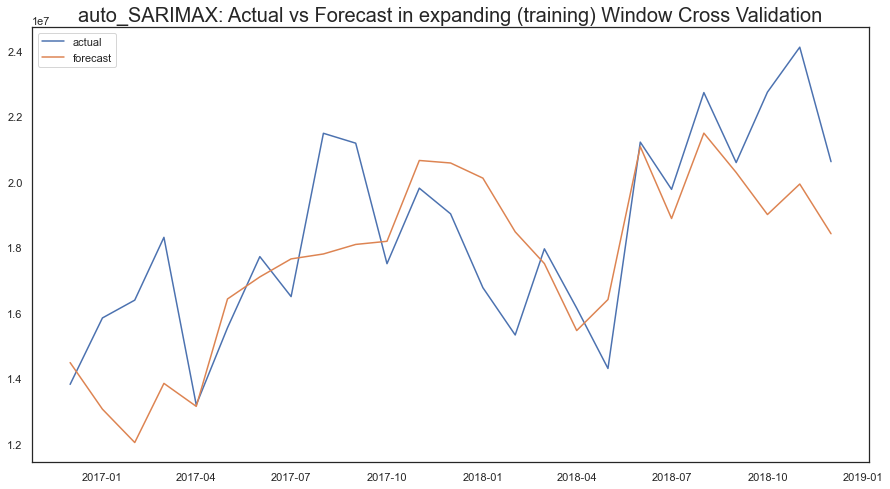

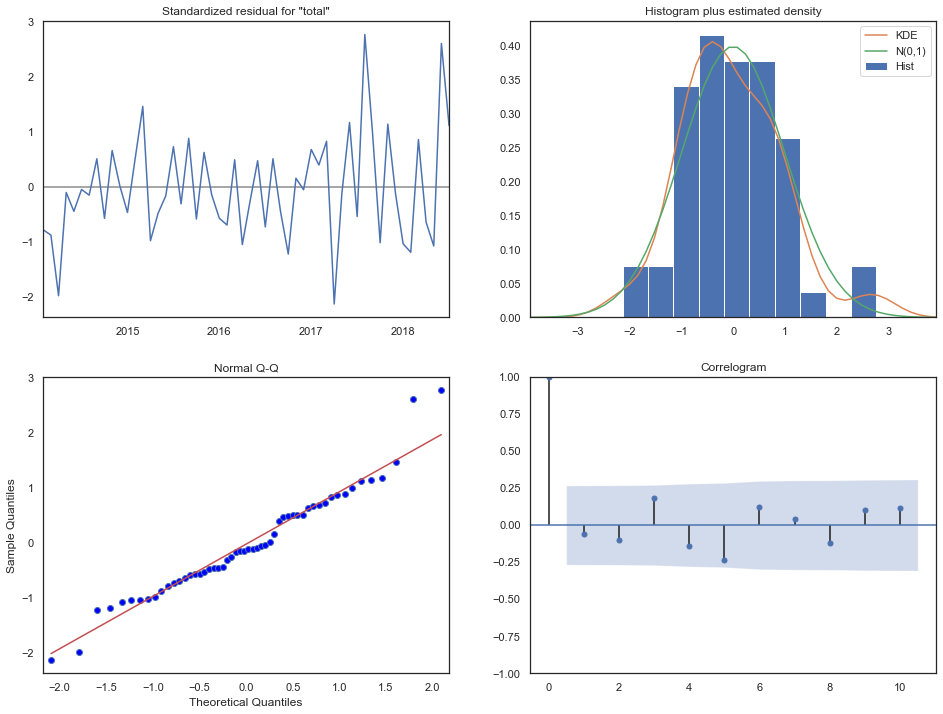

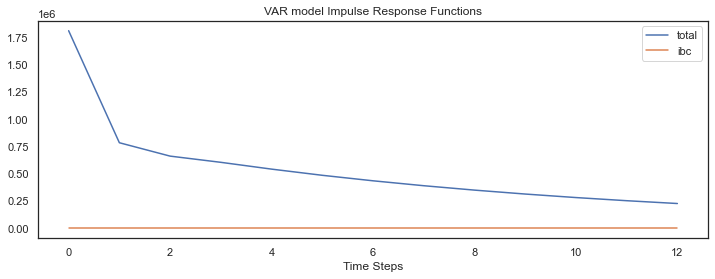

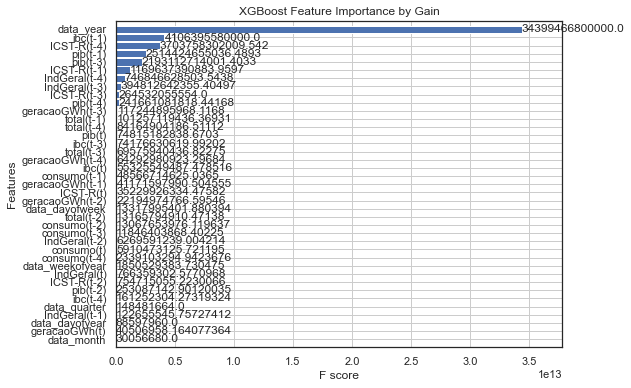

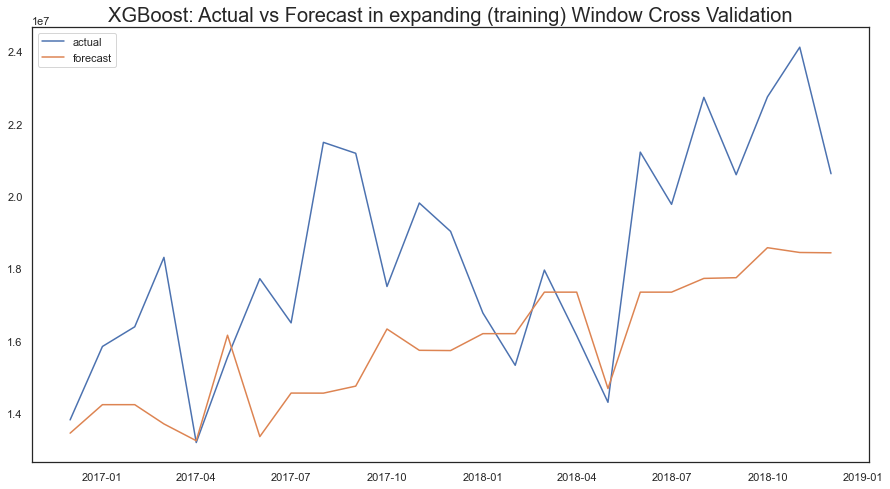

In [18]:
model = AT.auto_timeseries(score_type='rmse',
                time_interval='M',
                non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                model_type=['best'],
                verbose=2)
"""
Lista de Modelos permitidos (10): best, prophet, stats, ml, arima, ARIMA, 
                                    Prophet, SARIMAX, VAR, ML.
"""

model.fit(traindata, ts_column,target)

 A ferramenta ofereceu um ranking...
 
 Leaderboard with best model on top of list:
            name          rmse
1  auto_SARIMAX  2.280062e+06
3            ML  3.180795e+06
2           VAR  3.560624e+06
0       Prophet  3.740836e+06

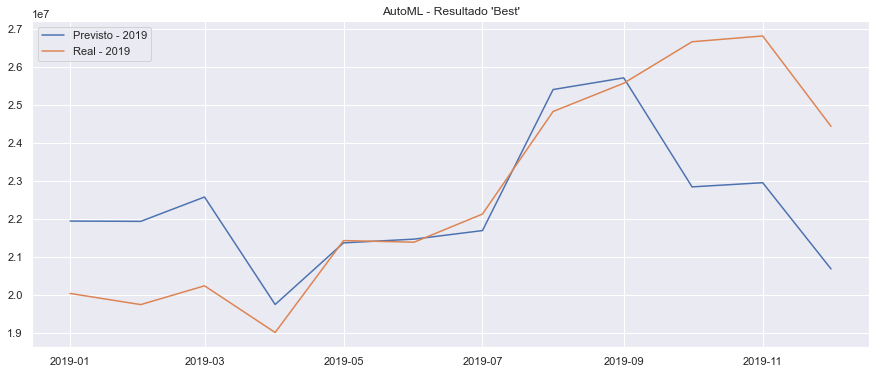

O valor do rmse é:  2212519.0524612465


In [19]:
### Best => auto_SARIMAX
predicao = model.predict(testdata, model='best')
resultado = predicao.loc[:, ['yhat']]
resultado = resultado.reset_index()
resultado = resultado.rename(columns={'index': 'data'})

real = testdata.loc[:,['data', 'total']]

final_2019 = pd.merge(resultado, real, how = 'inner')
x = final_2019['data']
y1 = final_2019['yhat']
y2 =final_2019['total']

sns.set()
plt.figure(figsize=(15,6))
plt.title('AutoML - Resultado \'Best\'')
plt.plot(x,y1,label="Previsto - 2019")
plt.plot(x,y2,label="Real - 2019")
plt.legend()
plt.show()

print('O valor do rmse é: ', \
          mt.sqrt(mean_squared_error(final_2019['yhat'], final_2019['total'])))